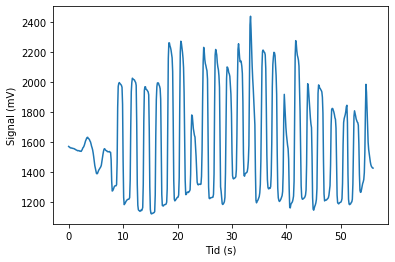

In [4]:
from pylab import *


file = loadtxt('sample.csv', float, delimiter=",", usecols=(1,2))

tid = [x[0] for x in file]
data = [x[1] for x in file]

plot(tid, data)
xlabel("Tid (s)")
ylabel("Signal (mV)")
show()

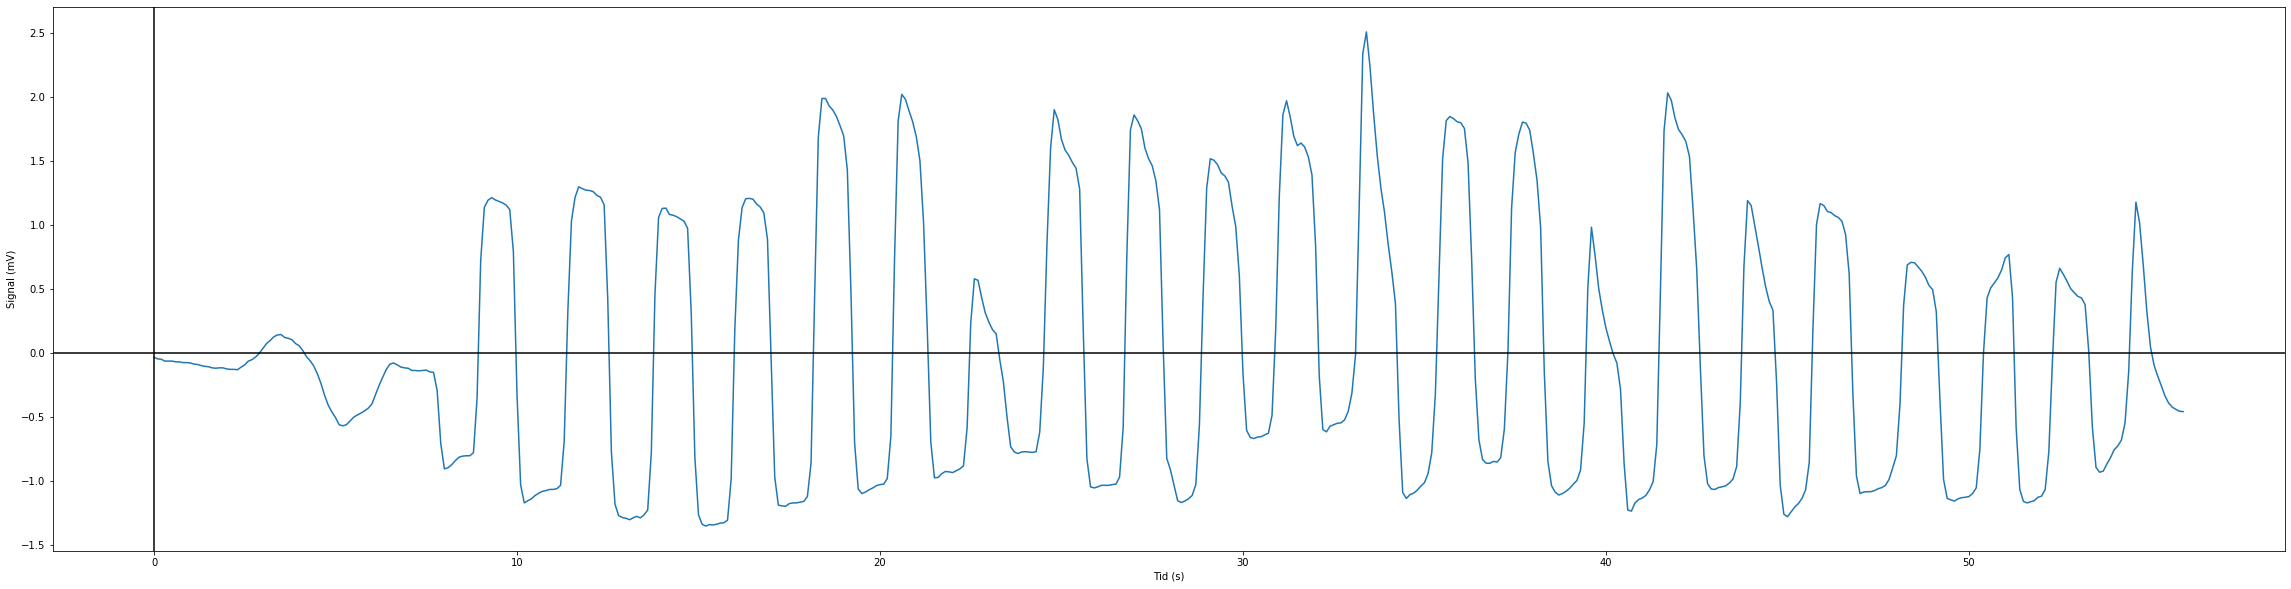

In [5]:
normalisert = (data - mean(data)) / std(data)
figure(figsize=(40,10))
xticks(range(int(min(tid)), int(max(tid)), 10))

plot(tid, normalisert)
xlabel("Tid (s)")
ylabel("Signal (mV)")
axhline(y=0, color="black")
axvline(x=0, color="black")
show()

In [6]:
# Definerer funksjoner fra de diskrete verdiene
def f(x):
    feilmargin = 0.001
    funksjonsverdi = 0
    for i in range(len(tid)):
        if abs(tid[i]-x)<=feilmargin:
            funksjonsverdi=normalisert[i]
    return funksjonsverdi

#Definerer den deriverte av pustedataene fra de diskrete verdiene
def Df(x):
    feilmargin = 0.0001
    funksjonsverdi = 0
    for i in range(len(tid)):
        if abs(tid[i]-x)<=feilmargin:
            funksjonsverdi=derivert_signal[i]
    return funksjonsverdi

In [7]:
TOL = 1E-10

def halver(f, a=3, b=4, N=10000):
    m = (a + b) / 2
    if f(a)*f(b) > 0:
        return None
    for i in range(N):
        if abs(f(m)) > TOL:
            if f(a) * f(m) < 0:
                b = m
            elif f(b) * f(m) < 0:
                a = m
            m = (a + b) / 2
    return round(m, 5)

In [10]:
nullpunkter = [halver(f, x, x + 1) for x in range(int(max(tid)))]
nullpunkter = [x for x in nullpunkter if x]
print(nullpunkter)

[2.75, 4.25, 8.75, 9.75, 11.25, 12.75, 13.75, 14.75, 15.75, 16.75, 18.25, 19.25, 20.25, 21.25, 22.25, 23.25, 24.75, 25.75, 26.75, 27.75, 28.75, 29.75, 30.75, 32.25, 33.25, 34.25, 35.25, 36.25, 37.25, 38.25, 39.25, 40.25, 41.25, 42.75, 43.75, 44.75, 45.75, 46.75, 48.25, 49.25, 50.25, 51.25, 52.25, 53.25, 54.25]


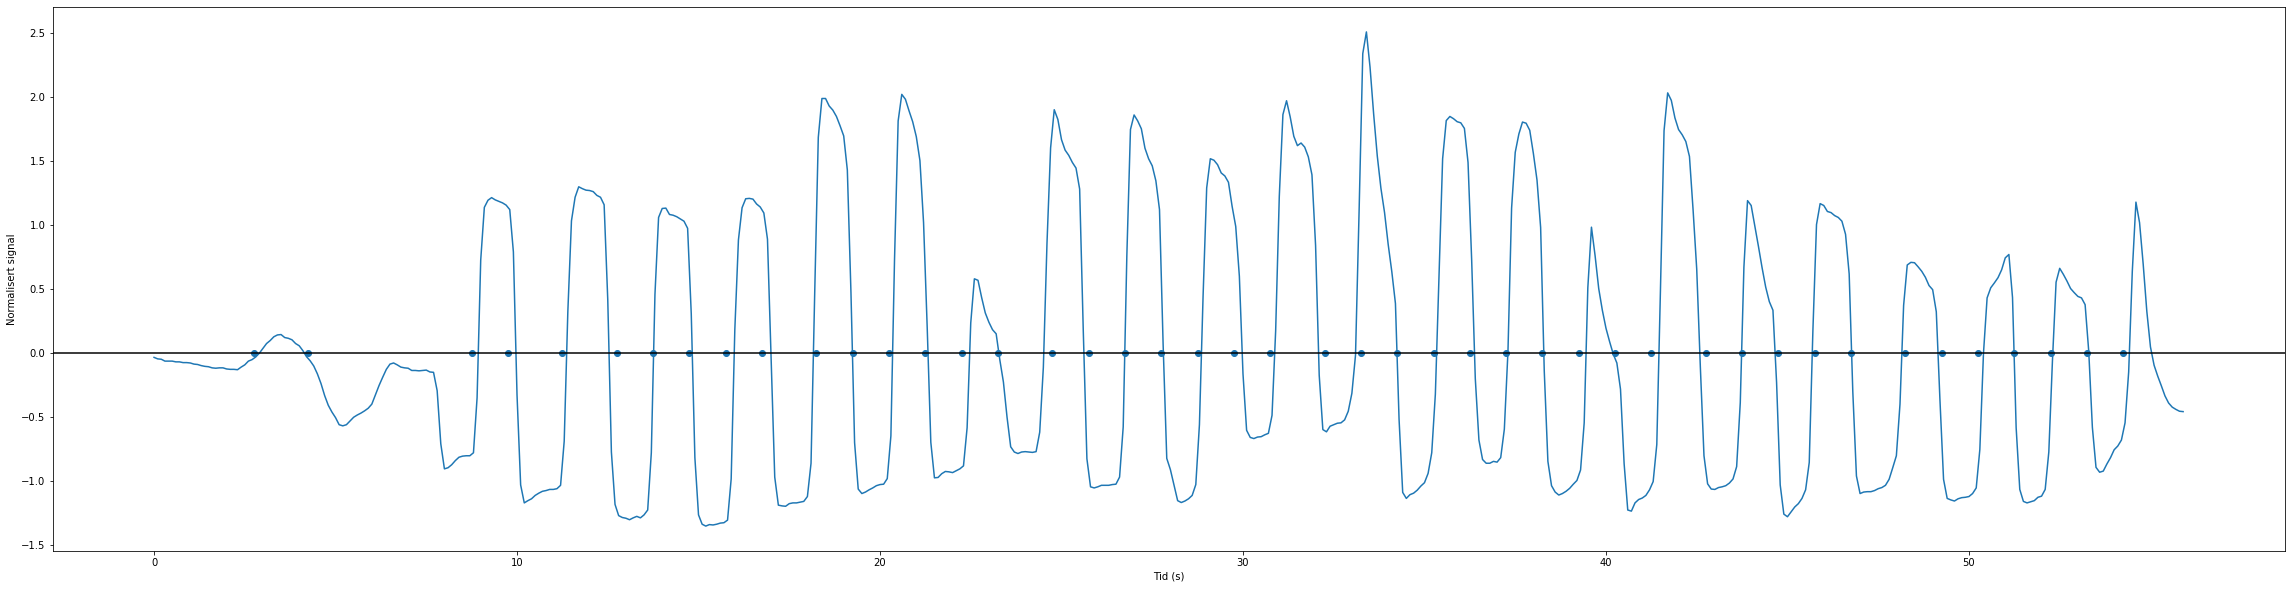

In [14]:
figure(figsize=(40,10))
xticks(range(int(min(tid)), int(max(tid)), 10))
scatter(nullpunkter, [0 for x in range(len(nullpunkter))])
plot(tid, normalisert)
axhline(y=0, color="black")
ylabel("Normalisert signal")
xlabel("Tid (s)")
show()